<a href="https://colab.research.google.com/github/ChagataiDuru/CS304-IntroAI-CollabNotebooks/blob/main/CS304_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1
If you have any questions please send an email to the TA Ahmet Tavlı (ahmet.tavli@ozu.edu.tr) (Office hours: Monday 245A 16.00 - 18.00)

# Step 1: Load and analyze the data

## Step 1.a Load the two datasets ##

In [1]:
# First, let's check whether the training and the test files exist in our file.
from os.path import exists
import itertools as itertools

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

train_data = "/content/drive/MyDrive/Colab Notebooks/CS304/HW1/titanictrain.csv"
test_data = "/content/drive/MyDrive/Colab Notebooks/CS304/HW1/titanictest.csv"

# - Supress all warnings (Optional)
import warnings
warnings.simplefilter(action='ignore',
                      category=FutureWarning)

if exists(train_data) and exists(test_data):
    print(f"\nBoth {train_data} and {test_data} exists.")
else:
    print("Please set directory to read the files")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Both /content/drive/MyDrive/Colab Notebooks/CS304/HW1/titanictrain.csv and /content/drive/MyDrive/Colab Notebooks/CS304/HW1/titanictest.csv exists.


In [2]:
# Let's load the training and the test data and display their types.
# Hint!: you can use the read_csv from pandas and type built-in method

from pandas import read_csv

#  Add your code here
#  -------------------

# Load the datasets
train_df = read_csv(train_data)
test_df = read_csv(test_data)
#  -------------------


##Step 1.b Display the shape of both training and test data.##

The shape of each data shows a summary of the dataset.

For example, "(890, 12)" should be interpreted as 890 samples with ten features, where

890 is the row size (or height of the data)
12 is the column size (or width of the data)

**Hint!**: You can use the shape method

In [3]:
#  Add your code here
#  -------------------
# Shapes of datasets
print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
#  ---------------------

Training set shape: (891, 12)
Test set shape: (418, 11)


## Step 1.c Display the first five rows of training and test data ##

In [4]:
#  Add your code here to display training data
#  -------------------
print("\nTraining set (first 5 rows):\n", train_df.head())
#  -------------------


Training set (first 5 rows):
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

In [5]:
#  Add your code here to display test data
#  -------------------
print("\nTest set (first 5 rows):\n", test_df.head())
#  -------------------


Test set (first 5 rows):
    PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


## Step 1.e Determine which column exists in the training set but is missing in the test set ##

Training and test sets have different number of features (columns).

In Step 1.b you saw that the traind_df has 12 columns bur test_df has 11 columns

We need to find which column is missing in the test data.

**Hint!**: You can access the features using keys method.

**Hint!**: Iterate through the keys of training samples, and check if it is in the set of test features.

In [6]:
#  Add your code here
#  -------------------
#  Missing column in test set
missing_col = set(train_df.columns) - set(test_df.columns)
print("\nColumn missing in test set:", missing_col)
print("\nFeatures: ", train_df.columns)
#  -------------------


Column missing in test set: {'Survived'}

Features:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## Step 1.f Observe the datatype of each column using the .info() method ##

In [7]:
# inspect training data
#  Add your code here
#  -------------------
#  Data types and summary statistics
print("\nTraining set info:\n", train_df.info())
#  -------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Training set info:
 None


In [8]:
# describe the statistics of numerical attribures of training set
#  Add your code here
#  -------------------
print("\nTraining set numerical descriptions:\n", train_df.describe())
#  -------------------


Training set numerical descriptions:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [9]:
# inspect test data
#  Add your code here
#  -------------------
print("\Test set info:\n", test_df.info())
#  -------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
\Test set info:
 None


[link text](https://)## Step 1.g. Determine the number and percentage of passengers who survived. ##

In [10]:
#  Add your code here
#  -------------------
#  Survival statistics
survived = train_df['Survived'].value_counts()
percent_survived = survived[1] / len(train_df) * 100

print("\nNumber of survived passengers:", survived[1])
print("Percentage of survived passengers:", percent_survived)

#  -------------------


Number of survived passengers: 342
Percentage of survived passengers: 38.38383838383838



# Step 2: Prepare the data for classification #

## Step 2.a Extract the target label (i.e. "Survived") from the training set and assign it to the variable "y_train" ##

In [11]:
#  Add your code here
#  -------------------
y_train = train_df.Survived
#  -------------------

## Step 2.b Copy the columns "Pclass","Sex", "Age", "Fare" to a new dataframe##

Name the new dataframe as x_train
Display the top 5 rows of x_train

In [12]:
#  Add your code here
#  -------------------
features = ["Pclass", "Sex", "Age", "Fare"]
X_train = train_df[features]
#  -------------------

## Step 2.c Add a new feature "FamilySize" ##

"Sibsp" and "Parch" features are related.

Instead of using them separately, we can use their sum as a feature.

**Hint!**: We can add the sum as a new column to the new data frame object as new_df['FamilySize'] = Sibsp + Parch

**Hint!:** We can also limit the sum so that it does not exceed 4. (For this purpose one option is use the apply method.)

Display the first five rows of x_train

In [13]:
#  Add your code here
#  -------------------
X_train["FamilySize"] = train_df["SibSp"] + train_df["Parch"]
X_train["FamilySize"] = X_train["FamilySize"].clip(upper=4)  # Limit family size to 4
#  -------------------

<ipython-input-13-048a2f32aba9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["FamilySize"] = train_df["SibSp"] + train_df["Parch"]
<ipython-input-13-048a2f32aba9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["FamilySize"] = X_train["FamilySize"].clip(upper=4)  # Limit family size to 4


## Step 2.g. Use a pipeline to implement Steps 2.d,e,f. OR implement them one-by-one. ##  

In [14]:
#  Add your code here
#  -------------------
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['Sex'] = le.fit_transform(X_train['Sex'])
print(X_train.head())
# ------Impute Part------
from sklearn.impute import SimpleImputer
imputer = SimpleImputer( strategy='median')
X_train_imputed_median = X_train.copy()
X_train_imputed_median[['Age', 'Fare']] = imputer.fit_transform(X_train[['Age', 'Fare']])
print("Imputed Median")
print(X_train_imputed_median.head())

'''
imputer = SimpleImputer( strategy='constant', fill_value=0)
X_train_imputed_constant = X_train.copy()
X_train_imputed_constant[['Age', 'Fare']] = imputer.fit_transform(X_train[['Age', 'Fare']])
print("Imputed Constant")
print(X_train_imputed_constant.head())

def impute_by_group(df, column):
    """Imputes missing values in a column based on 'Sex' and 'Pclass' group means"""
    group_means = df.groupby(['Sex', 'Pclass'])[column].mean()

    def fill_missing(row):
        sex = row['Sex']
        pclass = row['Pclass']
        if pd.isna(row[column]):
            return group_means.loc[sex, pclass]
        else:
            return row[column]

    df[column] = df.apply(fill_missing, axis=1)

impute_by_group(X_train, 'Age')
impute_by_group(X_train, 'Fare')

print("Imputed by Group")
print(X_train.head())'''
X_train = X_train_imputed_median
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['Age', 'Fare']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
print(X_train.describe())

#  -------------------

   Pclass  Sex   Age     Fare  FamilySize
0       3    1  22.0   7.2500           1
1       1    0  38.0  71.2833           1
2       3    0  26.0   7.9250           0
3       1    0  35.0  53.1000           1
4       3    1  35.0   8.0500           0
Imputed Median
   Pclass  Sex   Age     Fare  FamilySize
0       3    1  22.0   7.2500           1
1       1    0  38.0  71.2833           1
2       3    0  26.0   7.9250           0
3       1    0  35.0  53.1000           1
4       3    1  35.0   8.0500           0
           Pclass         Sex         Age        Fare  FamilySize
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     2.308642    0.647587    0.363679    0.062858    0.785634
std      0.836071    0.477990    0.163605    0.096995    1.195524
min      1.000000    0.000000    0.000000    0.000000    0.000000
25%      2.000000    0.000000    0.271174    0.015440    0.000000
50%      3.000000    1.000000    0.346569    0.028213    0.000000
75%      3.000000  

<ipython-input-14-b324cd5c5b0e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = le.fit_transform(X_train['Sex'])


# Step 3: Train two different ML models and compare their accuracies #

## Step 3.a Split into training and test set, ratio: 80/20 ##

In [15]:
from sklearn.model_selection import train_test_split

#  Add your code here
#  -------------------
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
#  -------------------

## Step 3.b Train a logistic regression classifier and test the accuracy ##

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#  Add your code here
#  -------------------
log_reg = LogisticRegression()
log_reg.fit(X_train_split, y_train_split)
y_pred_lr = log_reg.predict(X_test_split)


accuracy_lr = accuracy_score(y_test_split, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

#  -------------------

Logistic Regression Accuracy: 0.7932960893854749


## Step 3.c Train a random forest classifier and test the accuracy ##

In [17]:
from sklearn.ensemble import RandomForestClassifier
from numpy import ravel

#  Add your code here
#  -------------------

rf_model = RandomForestClassifier()
rf_model.fit(X_train_split, y_train_split)
y_pred_rf = rf_model.predict(X_test_split)

accuracy_rf = accuracy_score(y_test_split, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


#  -------------------

Random Forest Accuracy: 0.7988826815642458


## Step 3.d Train a logistic regression classifier using 5-fold cross validation. ##

In [18]:
from sklearn.model_selection import cross_val_score

#  Add your code here
#  -------------------

# Logistic Regression with Cross-Validation
scores_lr = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Mean Accuracy:", scores_lr.mean())
print("Logistic Regression Cross-validation Standard Deviation:", scores_lr.std())
#  -------------------

Logistic Regression Cross-Validation Mean Accuracy: 0.7923733601154981
Logistic Regression Cross-validation Standard Deviation: 0.017336076052274815


## Step 3.e Train a random forest classifier using 5-fold cross validation.

In [19]:
#  Add your code here
#  -------------------

# Random Forest with Cross-Validation
scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Mean Accuracy:", scores_rf.mean())
print("Random Forest Cross-validation Standard Deviation:", scores_rf.std())

#  -------------------

Random Forest Cross-Validation Mean Accuracy: 0.8137279517921036
Random Forest Cross-validation Standard Deviation: 0.025412963672960188


## Step 3.f Inspect the confusion matrices of the two classifiers ##

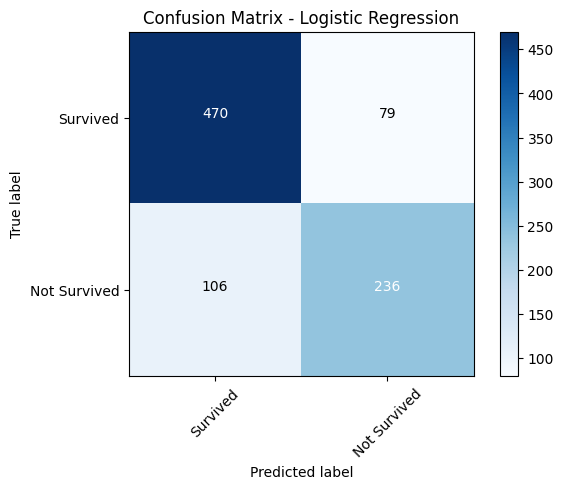

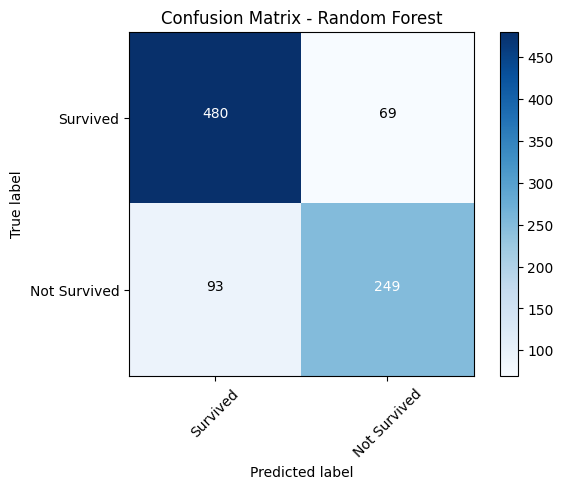

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, auc

#  Add your code  here
#  -------------------

predict_rl = cross_val_predict(
    log_reg,
    X_train,
    y_train,
    cv=5
)

predict_rf = cross_val_predict(
    rf_model,
    X_train,
    y_train,
    cv=5
)

cm_lr = confusion_matrix(y_train, predict_rl)
cm_rf = confusion_matrix(y_train, predict_rf)

# Plot confusion matrix for Logistic Regression
plt.imshow(cm_lr, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Survived','Not Survived'], rotation=45)
plt.yticks(tick_marks, ['Survived','Not Survived'])

thresh = cm_lr.max() / 2.
for i, j in itertools.product(range(cm_lr.shape[0]), range(cm_lr.shape[1])):
    plt.text(j, i, cm_lr[i, j],
             horizontalalignment="center",
             color="white" if cm_lr[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

# Plot confusion matrix for Random Forest
plt.imshow(cm_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Survived','Not Survived'], rotation=45)
plt.yticks(tick_marks, ['Survived','Not Survived'])

thresh = cm_rf.max() / 2.
for i, j in itertools.product(range(cm_rf.shape[0]), range(cm_rf.shape[1])):
    plt.text(j, i, cm_rf[i, j],
             horizontalalignment="center",
             color="white" if cm_rf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

#  -------------------

## Step 3.g Calculate the precision and recall scores of the two classifiers ##

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

#  Add your code  here
#  -------------------
print("Logistic Regression:")
print("Precision:", precision_score(y_train, predict_rl))
print("Recall:", recall_score(y_train, predict_rl))
print("F1-Score:", f1_score(y_train, predict_rl))

print("\nRandom Forest:")
print("Precision:", precision_score(y_train, predict_rf))
print("Recall:", recall_score(y_train, predict_rf))
print("F1-Score:", f1_score(y_train, predict_rf))
#  -------------------

Logistic Regression:
Precision: 0.7492063492063492
Recall: 0.6900584795321637
F1-Score: 0.7184170471841704

Random Forest:
Precision: 0.7830188679245284
Recall: 0.7280701754385965
F1-Score: 0.7545454545454546


## Step 3.h Draw the precision-recall curves of the two classifiers. ##

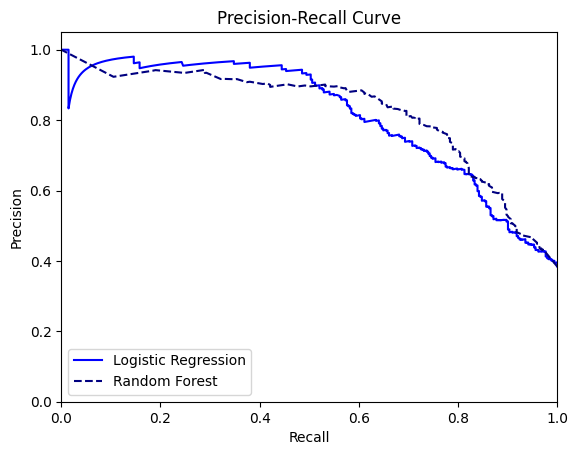

In [22]:
from sklearn.metrics import precision_recall_curve

#  Add your code  here
#  -------------------


predict_rl = cross_val_predict(
    log_reg,
    X_train,
    y_train,
    cv=5,
    method="predict_proba"
)

score_rl = predict_rl[:, 1]

predict_rf = cross_val_predict(
    rf_model,
    X_train,
    y_train,
    cv=5,
    method="predict_proba"
)

score_rf = predict_rf[:, 1]


precision_lr, recall_lr, _ = precision_recall_curve(y_train, score_rl)
precision_rf, recall_rf, _ = precision_recall_curve(y_train, score_rf)

plt.plot(recall_lr, precision_lr, color='blue', linestyle='-', label='Logistic Regression')
plt.plot(recall_rf, precision_rf, color='navy', linestyle='--', label='Random Forest')

# Set plot attributes
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
#  -------------------

## Step 3.h. Draw the ROC curves for the two classifiers and comment. ##

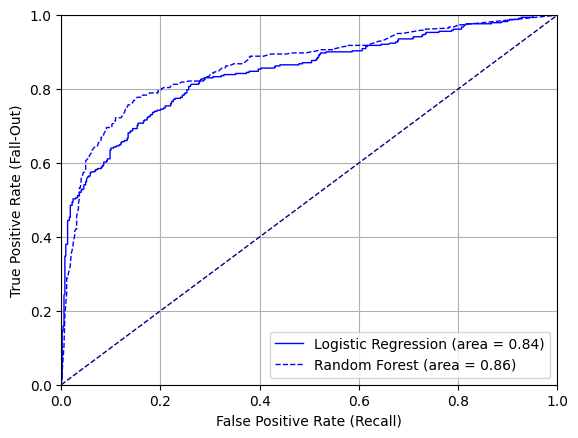

In [23]:
from sklearn.metrics import roc_curve

#  Add your code  here
#  -------------------

# Calculate ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_train, score_rl)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_train, score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Logistic Regression
lw = 1
plt.plot(fpr_lr, tpr_lr, color='blue', lw=lw, linestyle='-', label='Logistic Regression (area = %0.2f)' % roc_auc_lr)

# Plot ROC curve for Random Forest
plt.plot(fpr_rf, tpr_rf, color='blue', lw=lw, linestyle='--', label='Random Forest (area = %0.2f)' % roc_auc_rf)

# Plot the random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Set plot attributes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (Recall)')
plt.ylabel('True Positive Rate (Fall-Out)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#  -------------------

## Step 4 Comments ##
a. Which classifiers gave better results? Explain

Even though Random Forest is slightly more accurate than other algorithm, it's important to weigh the trade-off between recall and precision. With a precision of 0.76, the Logistic Regression model shows less false positives, or the prediction that someone would survive when they did not. A higher recall (0.87) in the Random Forest model indicates that more true positives—those who survived—were accurately identified.

b. Which data imputation method gave better results?

From my tests using grouping by mean and scaling features MinMaxScaler gave the better result for linear regresseion than giving constant zeros or Standard impute with median. But Standard Imputing with median give better result on Random Forest


```
Grouping by Mean(Age Fare)    StandartImpute(Constant 0)
__________________________    _____________________________    
Logistic Regression:          Logistic Regression:
Precision: 0.762987012987013  Precision: 0.7169230769230769
Recall: 0.6871345029239766    Recall: 0.6812865497076024   
F1-Score: 0.7230769230769231  F1-Score: 0.6986506746626686

Random Forest:                Random Forest:
Precision: 0.7777777777777778 Precision: 0.7716049382716049
Recall: 0.7368421052631579.   Recall: 0.7309941520467836
F1-Score: 0.7567567567567567  F1-Score: 0.7507507507507507                                                                

StandartImpute(Median)
_____________________________
Logistic Regression:
Precision: 0.7492063492063492
Recall: 0.6900584795321637
F1-Score: 0.7184170471841704

Random Forest:
Precision: 0.7830188679245284
Recall: 0.7280701754385965
F1-Score: 0.7545454545454546
```
           

                              
                              


c. How can you further improve the performance?

Hyperparameter Fine Tuning:
  Logistic Regression: Experiment with regularization parameters (C in LogisticRegression) to control overfitting.
  Random Forest: Fine-tune parameters like n_estimators (number of trees), max_depth (tree depth), min_samples_split, and min_samples_leaf.

Creating New Features: Generate new features based on preexisting ones (e.g., build a feature that depicts family relationships, extract titles from names).
